In [1]:
from matplotlib import pyplot as plt
import numpy as np


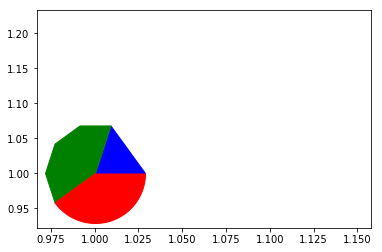

In [14]:
r1 = 0.2  # 20%
r2 = r1 + 0.4  # 40%

# define some sizes of the scatter marker
sizes = np.array([10000])

# calculate the points of the first pie marker
# these are just the origin (0, 0) + some (cos, sin) points on a circle
x1 = np.cos(2 * np.pi * np.linspace(0, r1, num=2))
y1 = np.sin(2 * np.pi * np.linspace(0, r1, num=2))
xy1 = np.row_stack([[0, 0], np.column_stack([x1, y1])])
s1 = np.abs(xy1).max()

x2 = np.cos(2 * np.pi * np.linspace(r1, r2, num=5))
y2 = np.sin(2 * np.pi * np.linspace(r1, r2, num=5))
xy2 = np.row_stack([[0, 0], np.column_stack([x2, y2])])
s2 = np.abs(xy2).max()

x3 = np.cos(2 * np.pi * np.linspace(r2, 1))
y3 = np.sin(2 * np.pi * np.linspace(r2, 1))
xy3 = np.row_stack([[0, 0], np.column_stack([x3, y3])])
s3 = np.abs(xy3).max()

fig, ax = plt.subplots()
ax.scatter(1, 1, marker=xy1, s=s1 ** 2 * sizes, facecolor='blue')
ax.scatter(1, 1, marker=xy2, s=s2 ** 2 * sizes, facecolor='green')
ax.scatter(1, 1, marker=xy3, s=s3 ** 2 * sizes, facecolor='red')

plt.show()

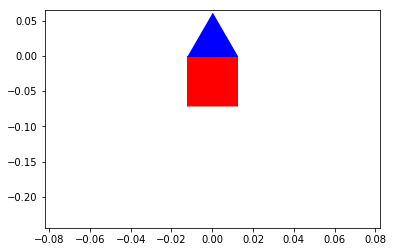

In [55]:
def tr_marker(offset=(0,0)):
    h = np.sin(np.deg2rad(60))
    offset = np.array(offset) * np.array([1, h])
    return offset + np.array([[-0.5, -h / 2],
                              [+0.5, -h / 2],
                              [0, h / 2]
                              ])

def sq_marker(offset=(0, 0)):
    return np.array(offset) + np.array([[-0.5, -0.5],
                                        [-0.5, +0.5],
                                        [+0.5, +0.5],
                                        [+0.5, -0.5],
                                        ])

s = 100
trm = tr_marker(offset=[0, 0.5])
sqm = sq_marker(offset=[0, -0.5])
fig, ax = plt.subplots()
ax.scatter(0, 0, marker=sqm, s=(s * np.abs(sqm).max()) ** 2, facecolor='red')
ax.scatter(0, 0, marker=trm, s=(s * np.abs(trm).max()) ** 2, facecolor='blue')
plt.show()

89913


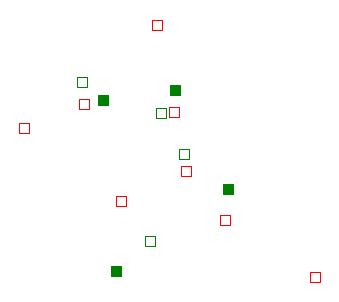

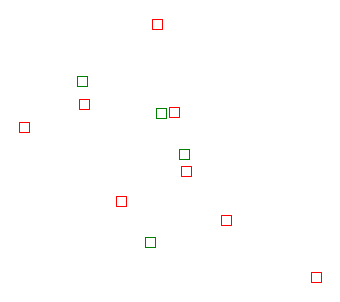

In [349]:
size = 100
X, Y = 2, 4
n = 8
seed = np.random.randint(100_000)
# seed = 46274
np.random.seed(seed)
print(seed)

def rand(n):
    a = np.array([])
    for i in range(n):
        for j in range(20_000):
            x = np.random.randn()
            if np.all(abs(a - x) > 0.08):
                a = np.append(a, x)
                break
        else:
            raise ValueError
    return a

def rand_jitter(jscale=0):
    arr = rand(n)
    stdev = jscale*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rand_data(pscale=(1, 1)):
    rdata = np.stack([rand_jitter(), rand_jitter()], axis=1)
    return rdata / np.array([pscale])

data = {
    # 'blue': rand_data(),
    'green': rand_data(),
    'red': rand_data(),
    # 'orange': rand_data(),
}

seen_idxs = {
    'blue': np.random.choice(n, size=n//2, replace=False),
    'green': np.random.choice(n, size=n//2, replace=False)
}
unseen_idxs = {k: np.setdiff1d(np.arange(n), v)
               for k, v in seen_idxs.items()}

settings = [
    # 'ic',
    # 'ig',
    # 'tc',
    'tg'
]

N = len(data) // 2
scale = 0.5
for name in settings:
    ts = {k: data[k] for k in ['red', 'orange'] if k in data}
    tr = {k: data[k][seen_idxs[k], :]
          for k in ['blue', 'green'] if k in data}
    if name[0] == 't':
        tr.update(ts)
    if name[1] == 'g':
        ts.update({k: data[k][unseen_idxs[k], :]
                   for k in ['blue', 'green'] if k in data})

    for split_name, split in [('tr', tr),
                              ('ts', ts)
                              ]:
        fig, ax = plt.subplots()
        for j, c in enumerate(data.keys()):
            if c not in split.keys():
                continue
            x, y = split[c].T
            cls_offset_x = scale * (j // N)
            cls_offset_y = scale * (j % N)

            x = x + cls_offset_x
            y = y + cls_offset_y
            ax.scatter(x, y, marker='s', s=size, edgecolor=c,
                       facecolor=c if (j < N and split_name == 'tr') else 'none')
            if name == 'tg':
                try:
                    uinds = unseen_idxs[c]
                    ux, uy = data[c][uinds, :].T
                    ux = ux + cls_offset_x
                    uy = uy + cls_offset_y
                    ax.scatter(ux, uy, marker='s', s=size, edgecolor=c, facecolor='none')
                except KeyError:
                    pass

        # ax.set_xlim([-0.1, 3.1])
        # ax.set_ylim([-0.1, 3.1])
        plt.tight_layout()
        ax.axis('off')
        ax.set_aspect('equal')
        # plt.margins(0.02, 0.02)
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
        fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        fname = f'zsl-{name}-{split_name}'
        fig.savefig(f'{fname}.png', bbox_inches = 'tight',
                    pad_inches=0, dpi=300)

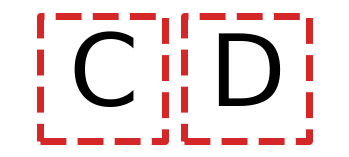

In [261]:
from matplotlib import patches

def draw(ax, coords, text, c, size=100, fsize=80, lw=4, **kwargs):
    coords = np.array(coords)
    x, y = coords  # center
    ax.scatter(x, y,
               marker='s',
               s=size**2,
               linewidths=lw,
               edgecolor=c,
               facecolor='none',
               **kwargs
               )
    ax.text(x, y, text,
            size=fsize,
            verticalalignment='center',
            horizontalalignment='center',
        )

settings = [
    # 'is-tr',
    'is-ts',
    # 'ig-ts',
    # 'ts-tr',
]
for setting in settings:
    fig, ax = plt.subplots()

    if setting == 'is-tr':
        for p, cls in [(1, 'A'),
                     (2, 'A'),
                     (3, 'B')
                     ]:
            draw(ax, coords=(p, 1), text=cls,
                 c='tab:green', linestyle='-')
        plt.margins(0.15, .6)
    elif setting == 'is-ts':
        size = 100
        fsize = 80
        scale = 1.25
        size, fsize = size * scale, fsize * scale
        for p, cls in [(1, 'C'),
                     (1.3, 'D'),
                     ]:
            draw(ax, coords=(p, 1), text=cls,
                 size=size, fsize=fsize,
                 c='tab:red', linestyle='--',
                 lw=7,
                 )
        ax.set_xlim([0.8, 1.5])
        ax.set_ylim([0.85, 1.15])
        # plt.margins(0.15, .6)
    elif setting == 'ig-ts':
        size = 100
        fsize = 80
        scale = 0.7
        size, fsize = size * scale, fsize * scale
        y, c  = 1, 'tab:green'
        for p, cls in [(1, 'A'),
                     (3, 'B'),
                     ]:
            draw(ax, coords=(p, y), text=cls,
                 size=size, fsize=fsize,
                 c=c, linestyle='--')
        y, c = 1, 'tab:red'
        for p, cls in [(5, 'C'),
                     (7, 'D'),
                     ]:
            draw(ax, coords=(p, y), text=cls,
                 size=size, fsize=fsize,
                 c=c, linestyle='--')
        ax.set_xlim([0, 8])
        ax.set_ylim([0.1, 2])
        # plt.margins(0.15, .6)
    elif setting == 'tg-tr':
        size = 100
        fsize = 80
        scale = 0.9
        size, fsize = size * scale, fsize * scale
        y, c  = 3, 'tab:green'
        for p, cls in [(1, 'A'),
                     (3, 'A'),
                     (5, 'B'),
                     ]:
            draw(ax, coords=(p, y), text=cls,
                 size=size, fsize=fsize,
                 c=c, linestyle='-')
        y, c = 1, 'tab:red'
        for p, cls in [(2, 'C'),
                     (4, 'D'),
                     ]:
            draw(ax, coords=(p, y), text=cls,
                 size=size, fsize=fsize,
                 c=c, linestyle='--')
        ax.set_xlim([0, 6])
        ax.set_ylim([0.1, 4])
        # plt.margins(0.15, .6)
    else:
        raise ValueError

    # plt.tight_layout()
    ax.axis('off')
    ax.set_aspect('equal')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    # fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    # fname = f'zsl-{name}-{split_name}'
    fig.savefig(f'zsl-{setting}.png', bbox_inches = 'tight',
                pad_inches=0, dpi=300)

In [266]:
import matplotlib.colors

print(', '.join([f'{x:.3f}'
       for x in matplotlib.colors.to_rgb('tab:green')]))
print(', '.join([f'{x:.3f}'
       for x in matplotlib.colors.to_rgb('tab:red')]))

0.173, 0.627, 0.173
0.839, 0.153, 0.157
